# Unsupervised learning with Principal Component Analysis (PCA)
### Dataset 1: [A3-data.txt](input/A3-data.txt)

### Description of the technique
PCA is a classical method used for dimensionality reduction. It is used to find the best linear projection in a smaller space. The best projection preserves as much variance as possible.

### Objective
Find and plot the PCA projection in two dimensions, using a different color
for each class.

## Index
<nav>

* [Import modules](#1)
* [Loading dataset](#2)
* [Standardize the data](#3)
* [PCA Projection to 2D](#4)
* [Explained Variance](#5)
* [Visualize 2D Projection](#6)
* [References](#7)
</nav>

<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<a id="2"></a>
## Loading dataset

In [4]:
# Load training data
filename = 'input\\A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]


<a id="3"></a>
## Standardize the data

In [29]:
features = ['x', 'y', 'z', 't']
target = ['class']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target (class)
y = df.loc[:, target].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

<a id="4"></a>
## PCA Projection to 2D

The original data has 4 columns (x, y, z, t). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [63]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])


print("original shape:   ", x.shape)
print("transformed shape:", principal_components.shape)

print(principal_df)

final_df = pd.concat([principal_df, df[['class']]], axis = 1)

print(final_df)

original shape:    (360, 4)
transformed shape: (360, 2)
     principal component 1  principal component 2
0               -11.140744               1.777584
1                 5.264961               1.785206
2                -0.397063              -2.667042
3                -3.444823               4.255369
4                -0.098412              -3.439195
..                     ...                    ...
355               8.615611              -2.276113
356               1.393593              -2.163631
357              -2.531446               3.768607
358              -7.601317               4.863180
359              -7.504409              -1.242253

[360 rows x 2 columns]
     principal component 1  principal component 2  class
0               -11.140744               1.777584      1
1                 5.264961               1.785206      5
2                -0.397063              -2.667042      2
3                -3.444823               4.255369      1
4                -0.098412         

<a id="5"></a>
## Explained Variance

In [62]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[24.53191904 16.3023199 ]
[0.47551708 0.31599776]


<a id="6"></a>
## Visualize 2D Projection

[1, 2, 3, 4, 5, 6]


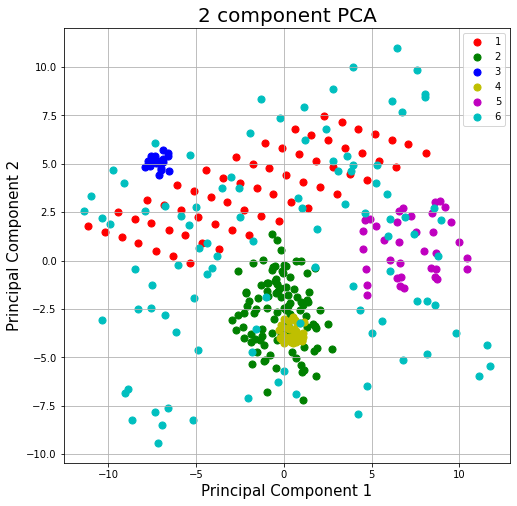

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = sorted(df['class'].unique())
print(targets)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['class'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<a id="7"></a>
## References

Principal Component Analysis:

- [PCA using Python (scikit-learn)
](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
- [Principal Component Analysis (PCA) in Python](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python)
- [PCA con Python](https://www.cienciadedatos.net/documentos/py19-pca-python.html)
- [Python para todos: Tutorial de PCA en 5 sencillos pasos](https://empresas.blogthinkbig.com/python-para-todos-tutorial-de-pca-en-5/)
- [PCA Visualization in Python](https://plotly.com/python/pca-visualization/)

Feature Scaling:

- [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)